<a href="https://colab.research.google.com/github/Swarn36/Portugese_banking_data_analysis/blob/main/Portuguese_banking_institution_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview & Credit

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

This dataset is public available for research. The details are described in [Moro et al., 2011].


  [Moro et al., 2011]
  * S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology.
  
  * In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.


Available at:
  * [pdf](http://hdl.handle.net/1822/14838)
  * [bib](http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt)

Input variables:
* bank client data:
    1. age (numeric)
    2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
    3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
    4. education (categorical: "unknown","secondary","primary","tertiary")
    5. default: has credit in default? (binary: "yes","no")
    6. balance: average yearly balance, in euros (numeric)
    7. housing: has housing loan? (binary: "yes","no")
    8. loan: has personal loan? (binary: "yes","no")
* related with the last contact of the current campaign:
  9. contact: contact communication type (categorical: "unknown","telephone","cellular")
  10. day: last contact day of the month (numeric)
  11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12. duration: last contact duration, in seconds (numeric)
* other attributes:
  13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15. previous: number of contacts performed before this campaign and for this client (numeric)
  16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

* Output variable (desired target):
  17. y - has the client subscribed a term deposit? (binary: "yes","no")

# Data Collection and Wrangling

In [276]:
from ipywidgets import FloatSlider, Dropdown, IntSlider, interact # for making interactive dashboard

#visualisation and data structure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [277]:
df = pd.read_csv('/content/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [279]:
# finding if there is any null values in the dataset
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Let's get to the summary statistics for categorical data

In [280]:
df.select_dtypes('object').describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


marital, education, default, housing, loan, contact, poutcome and y all have small unique categorical values

In [281]:
df.select_dtypes('number').describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


It seems there are some outliers in our datset

<Axes: >

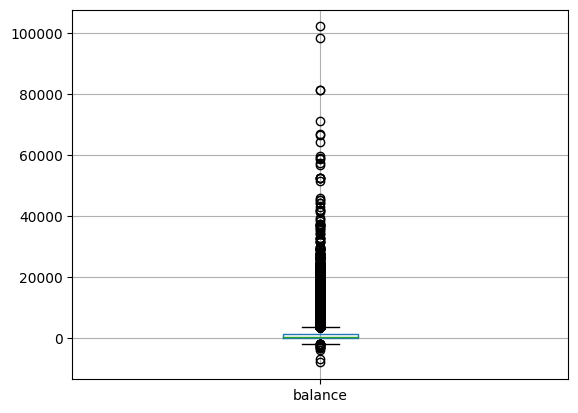

In [282]:
df[['balance']].boxplot()

In [283]:
# remove the outliers
mask_b = df['balance'] < 60_000

<Axes: >

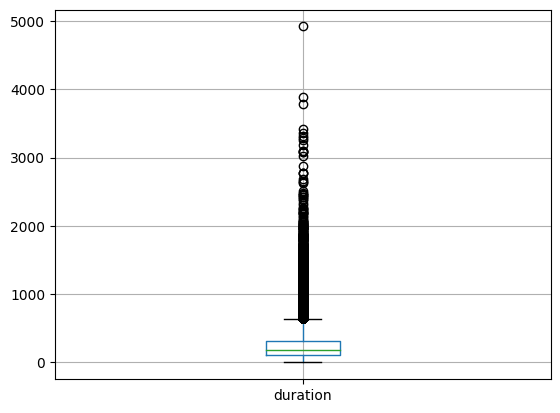

In [284]:
df[['duration']].boxplot()

In [285]:
# remove the outliers
mask_d = df['duration'] < 4_000

<Axes: >

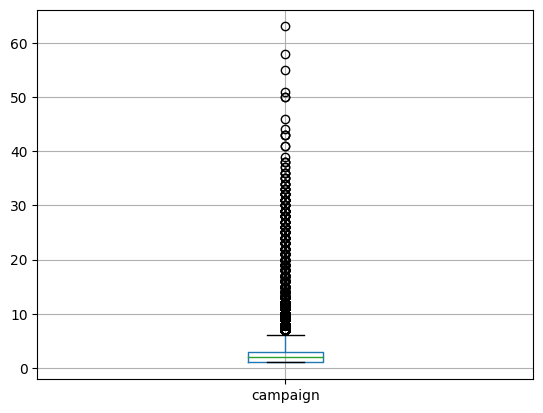

In [286]:
df[['campaign']].boxplot()

In [287]:
mask_c = df['campaign'] < 50

<Axes: >

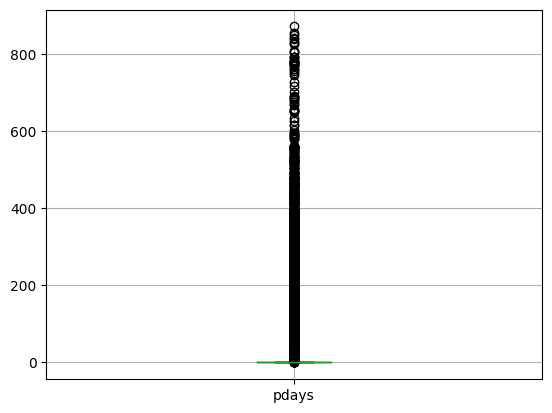

In [288]:
df[['pdays']].boxplot()

There is nothing to be removed as it seems to be consecutive numbers

<Axes: >

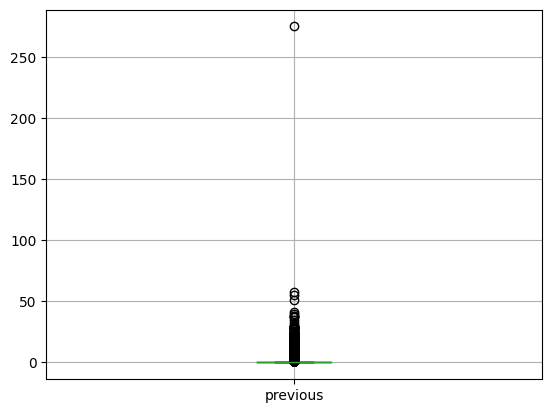

In [289]:
df[['previous']].boxplot()

In [290]:
mask_p = df['previous'] < 100

In [291]:
# remove all the outliers
df = df[mask_b & mask_c & mask_d & mask_p]

Now let's see the info of the dataset

In [292]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45195 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45195 non-null  int64 
 1   job        45195 non-null  object
 2   marital    45195 non-null  object
 3   education  45195 non-null  object
 4   default    45195 non-null  object
 5   balance    45195 non-null  int64 
 6   housing    45195 non-null  object
 7   loan       45195 non-null  object
 8   contact    45195 non-null  object
 9   day        45195 non-null  int64 
 10  month      45195 non-null  object
 11  duration   45195 non-null  int64 
 12  campaign   45195 non-null  int64 
 13  pdays      45195 non-null  int64 
 14  previous   45195 non-null  int64 
 15  poutcome   45195 non-null  object
 16  y          45195 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


As previously mentioned that main target is y, I will go for making it the target variable.

The 'y' has two class: one is positive class and the other is negative class

Let's see if there is any multicollinearity exist or not

In [294]:
corr = df.drop(columns='y').corr()
corr

<ipython-input-294-4015ea1e7f44>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='y').corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.094022,-0.008873,-0.005504,0.006410,-0.024006,0.001698
balance,0.094022,1.000000,0.007638,0.022315,-0.015513,0.003152,0.022203
day,-0.008873,0.007638,1.000000,-0.030087,0.163925,-0.093072,-0.057146
duration,-0.005504,0.022315,-0.030087,1.000000,-0.086237,-0.001547,0.000397
campaign,0.006410,-0.015513,0.163925,-0.086237,1.000000,-0.089370,-0.038931
pdays,-0.024006,0.003152,-0.093072,-0.001547,-0.089370,1.000000,0.542075
previous,0.001698,0.022203,-0.057146,0.000397,-0.038931,0.542075,1.000000


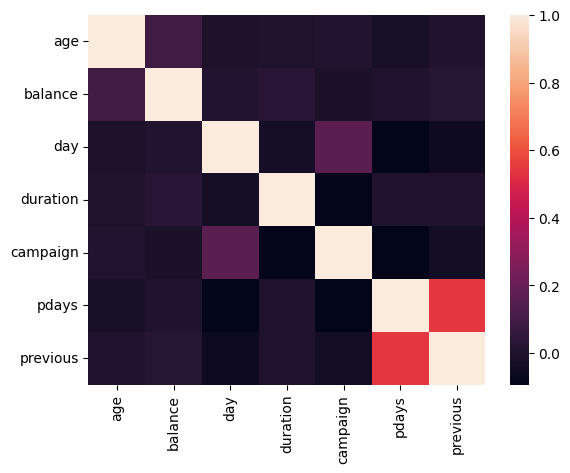

In [295]:
sns.heatmap(corr);

Only pday and previous has the higher correlation of 0.54.
`No multicollinearity detected`

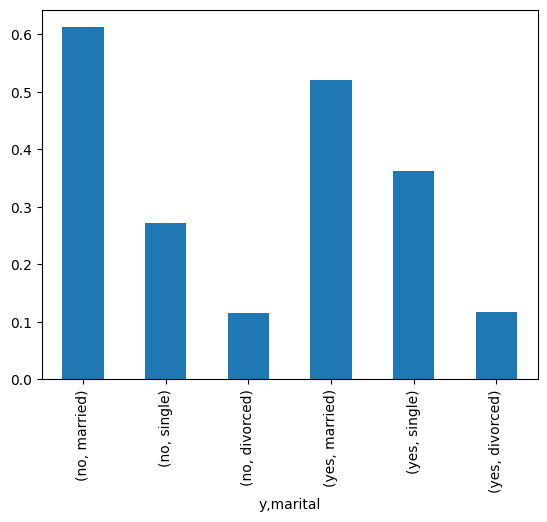

In [296]:
df.groupby('y')['marital'].value_counts(normalize=True).plot(kind='bar');

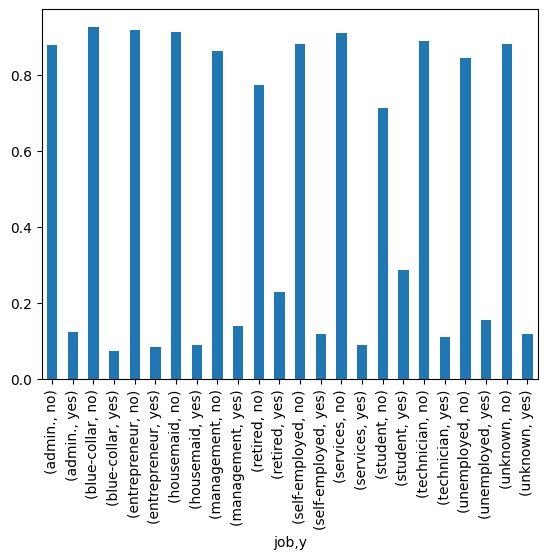

In [297]:
df.groupby('job')['y'].value_counts(normalize=True).plot(kind='bar');

From the job category: Student, Retired attempt more to the term loan

In [298]:
df.select_dtypes('object').nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

`As there are some categorical values I need to implement OrdinalEncoder class from category_encoders library`

In [299]:
# let's make the wrangle function
def wrangle(data):
  df= pd.read_csv(data)
  mask_b = df['balance'] < 60_000
  mask_d = df['duration'] < 4_000
  mask_c = df['campaign'] < 50
  mask_p = df['previous'] < 100

  df = df[mask_b & mask_c & mask_d & mask_p]
  df['y'] =df['y'].map({'yes': True, 'no': False})

  return df


# Model Implementation

In [300]:
df['y'].value_counts(normalize=True)

no     0.883018
yes    0.116982
Name: y, dtype: float64

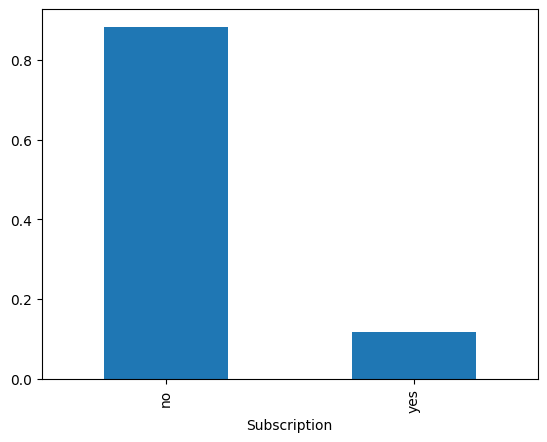

In [301]:
df['y'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Subscription');

As the target dataset is imbalanced, I will go RandomOverSampler and RandomUnderSampler class. And the target being in the classification problem I will implement Decision Tree, Random Forest and Gradient Boosting model to see which model depict the better values.

In [302]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (
                            ConfusionMatrixDisplay, # (.from_estimator, .from_predictions)
                            classification_report,
                            confusion_matrix,
                            accuracy_score,
                            )

First get the baseline accuracy in our model as our main target is find who will subscribe.

In [303]:
baseline_acc = df['y'].value_counts(normalize=True).max()

print(f'Baseline accuracy: {baseline_acc}')

Baseline accuracy: 0.8830180329682487


In [304]:
df['y'] =df['y'].map({'yes': True, 'no': False})

In [305]:
target = 'y'

X = df.drop(columns=[target, ])
y=df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (45195, 16)
y shape: (45195,)


##Split the dataset

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (36156, 16)
y_train shape: (36156,)
X_test shape: (9039, 16)
y_test shape: (9039,)


In [307]:
# first to do the over sampling
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (64034, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,45,entrepreneur,single,primary,no,0,no,no,cellular,7,apr,354,1,-1,0,unknown
1,36,services,married,secondary,no,1328,yes,no,unknown,6,jun,82,4,-1,0,unknown
2,37,blue-collar,married,secondary,no,1403,no,no,unknown,9,oct,14,1,-1,0,unknown
3,34,technician,divorced,tertiary,no,501,yes,no,unknown,19,may,546,12,-1,0,unknown
4,42,technician,single,secondary,no,-15,no,no,cellular,17,nov,89,1,145,1,failure


In [308]:
# first to do the under sampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

print("X_train_under shape:", X_train_under.shape)
X_train_under.head()

X_train_under shape: (8278, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,37,blue-collar,married,unknown,no,-118,yes,no,cellular,18,may,21,2,-1,0,unknown
1,43,blue-collar,married,primary,no,3131,yes,no,unknown,3,jun,441,3,-1,0,unknown
2,37,services,single,secondary,no,105,no,yes,cellular,21,nov,197,2,157,4,failure
3,32,housemaid,married,secondary,no,0,no,no,cellular,21,aug,435,2,-1,0,unknown
4,45,blue-collar,married,secondary,no,156,yes,yes,unknown,28,may,47,1,-1,0,unknown


As there are some values too much higher than some of the columns I like to implement Standard Scaler to scale the dataset

In [309]:
!pip install category_encoders

# Decision Tree

In [310]:
# import libraries to fit the model
from sklearn.preprocessing import StandardScaler
from category_encoders import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import make_pipeline

In [311]:
# fit the model
model_reg = make_pipeline(OrdinalEncoder(), StandardScaler(), DecisionTreeClassifier(random_state=42))
model_reg.fit(X_train, y_train)

model_over = make_pipeline(OrdinalEncoder(), StandardScaler(), DecisionTreeClassifier(random_state=42))
model_over.fit(X_train_over, y_train_over)

model_under = make_pipeline(OrdinalEncoder(), StandardScaler(), DecisionTreeClassifier(random_state=42))
model_under.fit(X_train_under, y_train_under)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['job', 'marital', 'education', 'default',
                                      'housing', 'loan', 'contact', 'month',
                                      'poutcome'],
                                mapping=[{'col': 'job', 'data_type': dtype('O'),
                                          'mapping': blue-collar       1
services          2
housemaid         3
technician        4
admin.            5
management        6
retired           7
student           8
self-employed     9
unemployed       10
entrepreneur     11
unknown          12
NaN              -2
dtype: int64},
                                         {'col': 'mari...
telephone    3
NaN         -2
dtype: int64},
                                         {'col': 'month',
                                          'data_type': dtype('O'),
                                          'mapping': may     1
jun     2
nov     3
aug     4
dec     5
oct     6
jul     7
feb     8
apr     9
sep    10
mar    11
jan    12
NaN    -2
dtype: int64},
                                         {'col': 'poutcome',
                                          'data_type': dtype('O'),
                                          'mapping': unknown    1
failure    2
other      3
success    4
NaN       -2
dtype: int64}])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [312]:
model = [model_reg, model_over, model_under]

for m in model:
  acc_train = m.score(X_train, y_train)
  acc_test = m.score(X_test, y_test)

  print(f'Training Accuracy: {round(acc_train, 4)}')
  print(f'Test Accuracy: {round(acc_test, 4)}')

Training Accuracy: 1.0
Test Accuracy: 0.8643
Training Accuracy: 1.0
Test Accuracy: 0.8669
Training Accuracy: 0.8462
Test Accuracy: 0.7931


Test accuracy in model_under is 79% where model_over predicts 87%. That's why i will go with model_over.

In [313]:
model_over.named_steps

{'ordinalencoder': OrdinalEncoder(cols=['job', 'marital', 'education', 'default', 'housing',
                      'loan', 'contact', 'month', 'poutcome'],
                mapping=[{'col': 'job', 'data_type': dtype('O'),
                          'mapping': entrepreneur      1
 services          2
 blue-collar       3
 technician        4
 management        5
 unknown           6
 admin.            7
 self-employed     8
 retired           9
 housemaid        10
 unemployed       11
 student          12
 NaN              -2
 dtype: int64},
                         {'col': 'marital', 'data_type': dtype('O'),
                          'mappi...
                         {'col': 'loan', 'data_type': dtype('O'),
                          'mapping': no     1
 yes    2
 NaN   -2
 dtype: int64},
                         {'col': 'contact', 'data_type': dtype('O'),
                          'mapping': cellular     1
 unknown      2
 telephone    3
 NaN         -2
 dtype: int64},
                

In [314]:
depth = model_over.named_steps['decisiontreeclassifier'].get_depth()
depth

39

## Hyperparamaters Tuning

In [315]:
depth_params = range(1, 40, 2)

training_acc = []
validation_acc = []

for d in depth_params:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(OrdinalEncoder(), DecisionTreeClassifier(max_depth=d, random_state=42))
    # Fit model to training data
    test_model.fit(X_train_over, y_train_over)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train, y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_test, y_test))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.6342792344285872, 0.8556809381568757, 0.8058413541320942]
Validation Accuracy Scores: [0.633145259431353, 0.8442305564774865, 0.7955526053767009]


Let's visualize the parameters

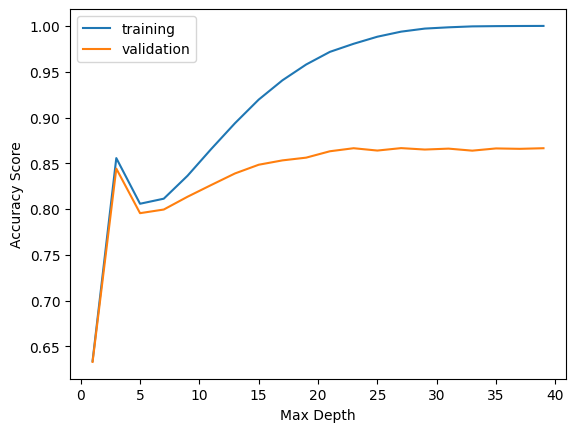

In [316]:
plt.plot(depth_params, training_acc, label= 'training')
plt.plot(depth_params, validation_acc, label='validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend();

In depth=23 the accuracy is looking good

In [317]:
# Build Model
model = make_pipeline(OrdinalEncoder(), DecisionTreeClassifier(max_depth=23, random_state=42))
# Fit model to training data
model.fit(X_train_over, y_train_over)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['job', 'marital', 'education', 'default',
                                      'housing', 'loan', 'contact', 'month',
                                      'poutcome'],
                                mapping=[{'col': 'job', 'data_type': dtype('O'),
                                          'mapping': entrepreneur      1
services          2
blue-collar       3
technician        4
management        5
unknown           6
admin.            7
self-employed     8
retired           9
housemaid        10
unemployed       11
student          12
NaN              -2
dtype: int64},
                                         {'col': 'mari...
                                          'mapping': cellular     1
unknown      2
telephone    3
NaN         -2
dtype: int64},
                                         {'col': 'month',
                                          'data_type': dtype('O'),
                                          'mapping': apr     1
jun     2
oct     3
may     4
nov     5
jul     6
aug     7
feb     8
jan     9
dec    10
mar    11
sep    12
NaN    -2
dtype: int64},
                                         {'col': 'poutcome',
                                          'data_type': dtype('O'),
                                          'mapping': unknown    1
failure    2
success    3
other      4
NaN       -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=23, random_state=42))])

In [318]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Testing Accuracy:", round(acc_test, 2))

Training Accuracy: 0.98
Testing Accuracy: 0.87


Our model just goes slightly near to the baseline accuracy.

Let's plot the tree

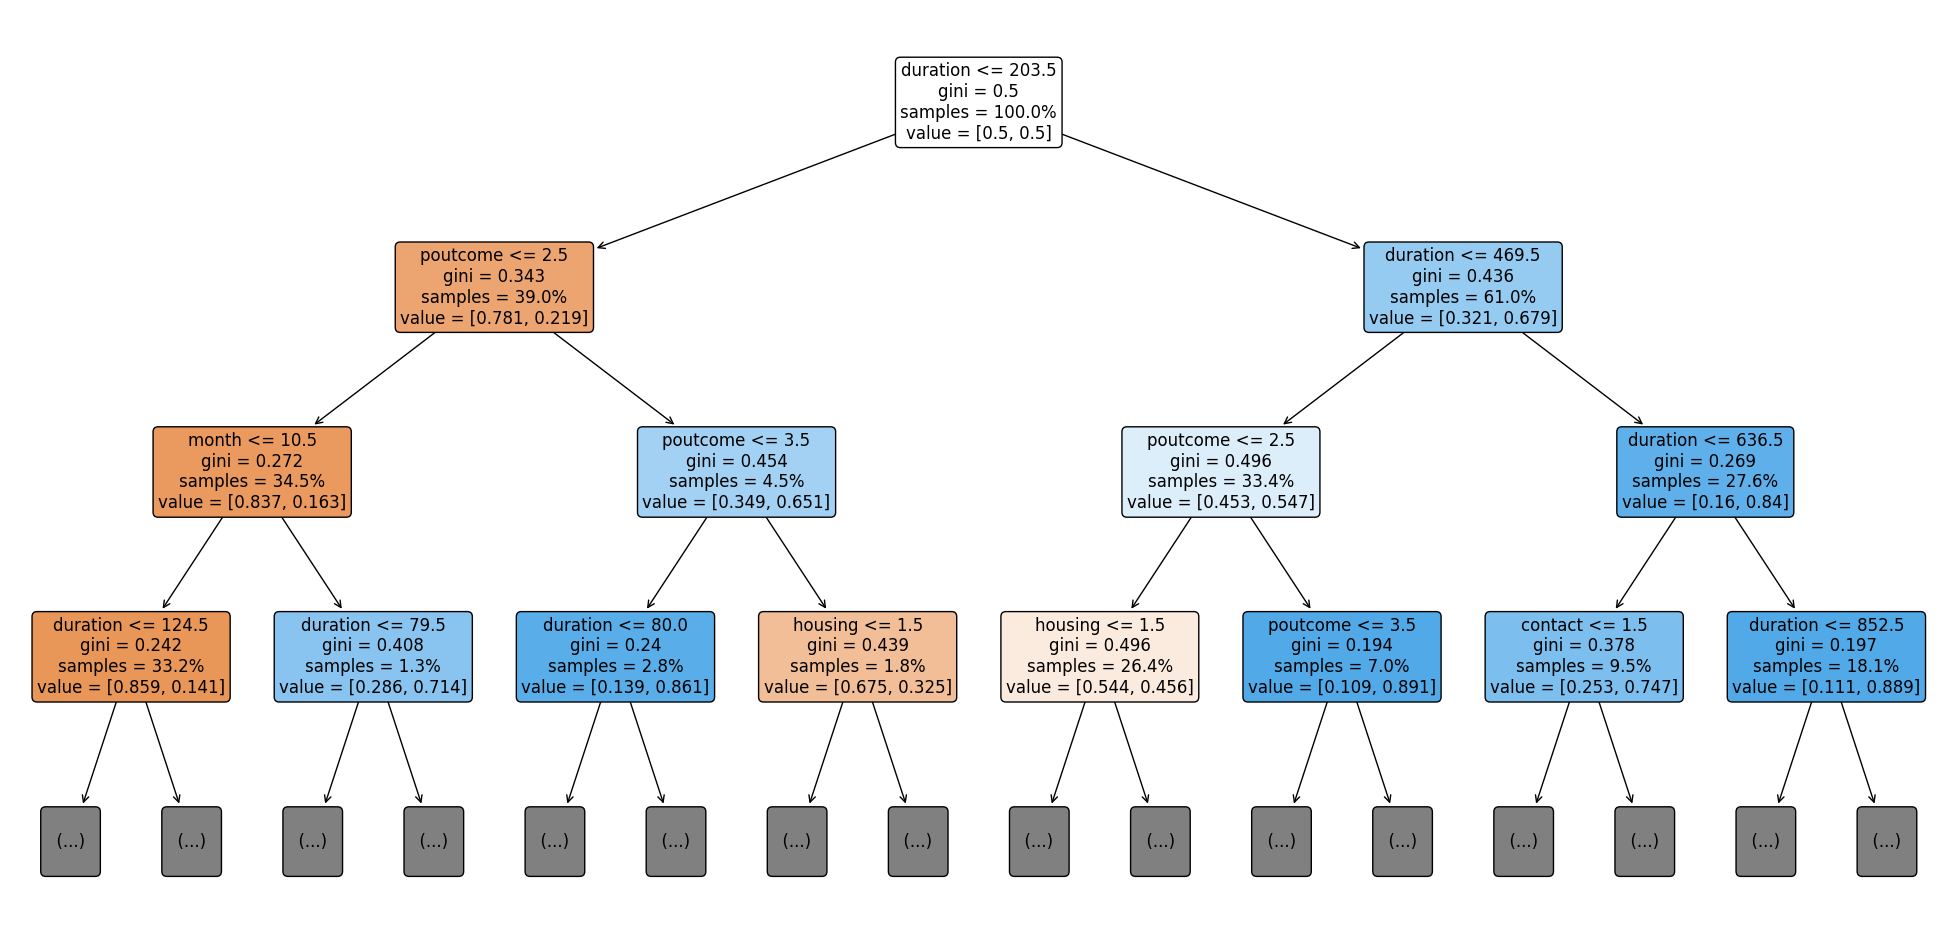

In [319]:
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model.named_steps['decisiontreeclassifier'],
    feature_names=list(X_train.columns),
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [320]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.93      0.92      0.92      7891
        True       0.47      0.49      0.48      1148

    accuracy                           0.87      9039
   macro avg       0.70      0.70      0.70      9039
weighted avg       0.87      0.87      0.87      9039



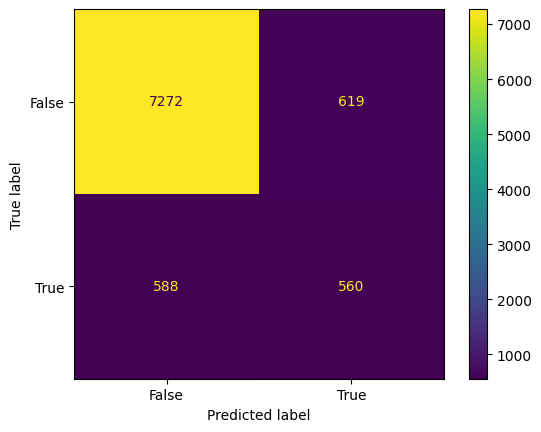

In [321]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [322]:
features = X_train.columns
importances = model.named_steps['decisiontreeclassifier'].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['age', 'job', 'marital'], dtype='object')
Importances: [0.06326435 0.02890436 0.00961872]


In [323]:
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.head()

default      0.001342
marital      0.009619
loan         0.010467
previous     0.011158
education    0.016973
dtype: float64

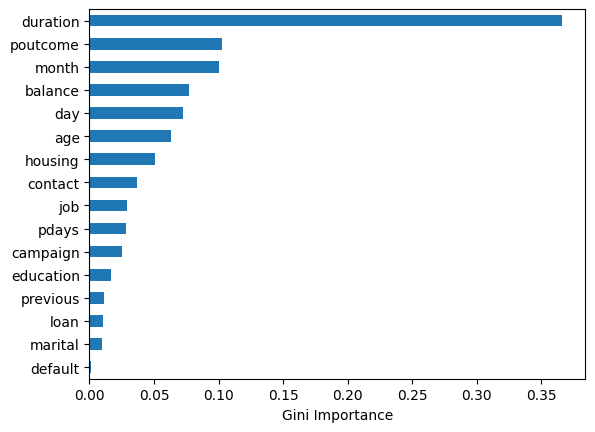

In [324]:
# Create horizontal bar chart
feat_imp.plot(kind='barh', xlabel="Gini Importance");

Make it interactive

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

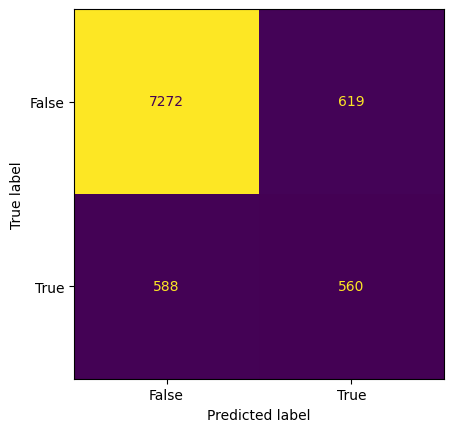

In [325]:
def make_cnf_matrix(threshold):
    y_pred_proba = model.predict_proba(X_test)[:, -1]
    y_pred = y_pred_proba > threshold
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    recall = (tp/(tp+fn))
    precision = (tp/(tp+fp))

    print(f'Recall: {recall}')
    print(f'Precision: {precision}')

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False);

thresh_widget = FloatSlider(min=0, max=1, step=0.05, value=0.5)

interact(make_cnf_matrix, threshold=thresh_widget);

# Random Forest

In [326]:
from sklearn.ensemble import RandomForestClassifier

In [327]:
clf = make_pipeline(OrdinalEncoder(), StandardScaler(), RandomForestClassifier(random_state=42))

In [328]:
clf.named_steps

{'ordinalencoder': OrdinalEncoder(),
 'standardscaler': StandardScaler(),
 'randomforestclassifier': RandomForestClassifier(random_state=42)}

In [329]:
params = {
    'randomforestclassifier__max_depth' : range(10,50,10),
    'randomforestclassifier__n_estimators' : range(25, 100, 25)
}

In [330]:
# build the model
model_rf1 = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [331]:
# Train model
model_rf1.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [332]:
model_rf1.best_estimator_

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['job', 'marital', 'education', 'default',
                                      'housing', 'loan', 'contact', 'month',
                                      'poutcome'],
                                mapping=[{'col': 'job', 'data_type': dtype('O'),
                                          'mapping': entrepreneur      1
services          2
blue-collar       3
technician        4
management        5
unknown           6
admin.            7
self-employed     8
retired           9
housemaid        10
unemployed       11
student          12
NaN              -2
dtype: int64},
                                         {'col': 'mari...
                                         {'col': 'month',
                                          'data_type': dtype('O'),
                                          'mapping': apr     1
jun     2
oct     3
may     4
nov     5
jul     6
aug     7
feb     8
jan     9
dec    10
mar    11
sep    12
NaN    -2
dtype: int64},
                                         {'col': 'poutcome',
                                          'data_type': dtype('O'),
                                          'mapping': unknown    1
failure    2
success    3
other      4
NaN       -2
dtype: int64}])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=40, n_estimators=50,
                                        random_state=42))])

In [333]:
model_rf1.best_params_

{'randomforestclassifier__max_depth': 40,
 'randomforestclassifier__n_estimators': 50}

In [334]:
acc_train = model_rf1.score(X_train, y_train)
acc_test = model_rf1.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Testing Accuracy:", round(acc_test, 2))

Training Accuracy: 1.0
Testing Accuracy: 0.9


In [335]:
# Print classification report
print(classification_report(y_test, model_rf1.predict(X_test)))

              precision    recall  f1-score   support

       False       0.93      0.95      0.94      7891
        True       0.61      0.51      0.56      1148

    accuracy                           0.90      9039
   macro avg       0.77      0.73      0.75      9039
weighted avg       0.89      0.90      0.89      9039



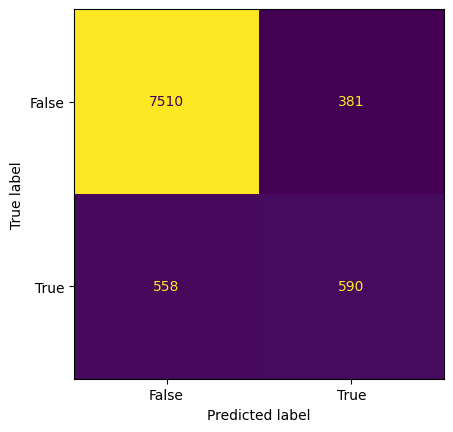

In [336]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_rf1, X_test, y_test, colorbar=False);

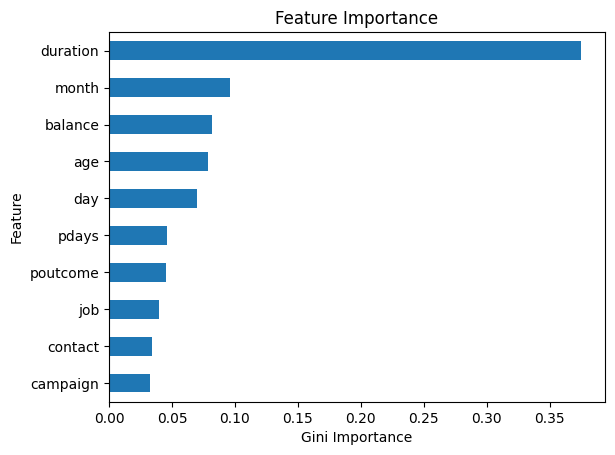

In [337]:
# Get feature names from training data
features = X_test.columns
# Extract importances from model
importances = model_rf1.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

Make it interactive

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

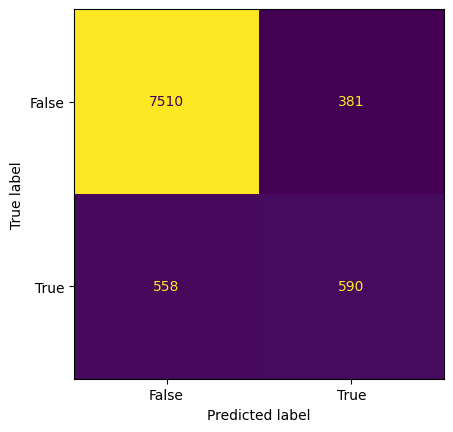

In [338]:
def make_cnf_matrix1(threshold):
    y_pred_proba = model_rf1.predict_proba(X_test)[:, -1]
    y_pred = y_pred_proba > threshold
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    recall = (tp/(tp+fn))
    precision = (tp/(tp+fp))

    print(f'Recall: {recall}')
    print(f'Precision: {precision}')

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False);

thresh_widget = FloatSlider(min=0, max=1, step=0.05, value=0.5)

interact(make_cnf_matrix1, threshold=thresh_widget);

# Gradient Boosting

In [339]:
from sklearn.ensemble import GradientBoostingClassifier

In [340]:
clf2 = make_pipeline(OrdinalEncoder(), StandardScaler(), GradientBoostingClassifier(random_state=42))

In [341]:
clf2.named_steps

{'ordinalencoder': OrdinalEncoder(),
 'standardscaler': StandardScaler(),
 'gradientboostingclassifier': GradientBoostingClassifier(random_state=42)}

In [342]:
params2 = {
    'gradientboostingclassifier__max_depth' : range(2, 5),
    'gradientboostingclassifier__n_estimators' : range(20,31,5)
}

In [343]:
model_grad = GridSearchCV(
        clf2,
        param_grid=params2,
        cv = 5,
        n_jobs=-1,
        verbose=1
)

In [344]:
model_grad.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5)},
             verbose=1)

In [345]:
acc_train = model_grad.score(X_train, y_train)
acc_test = model_grad.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.8388
Validation Accuracy: 0.8306


In [346]:
# Print classification report
print(classification_report(y_test, model_grad.predict(X_test)))

              precision    recall  f1-score   support

       False       0.97      0.83      0.90      7891
        True       0.42      0.85      0.56      1148

    accuracy                           0.83      9039
   macro avg       0.70      0.84      0.73      9039
weighted avg       0.90      0.83      0.85      9039



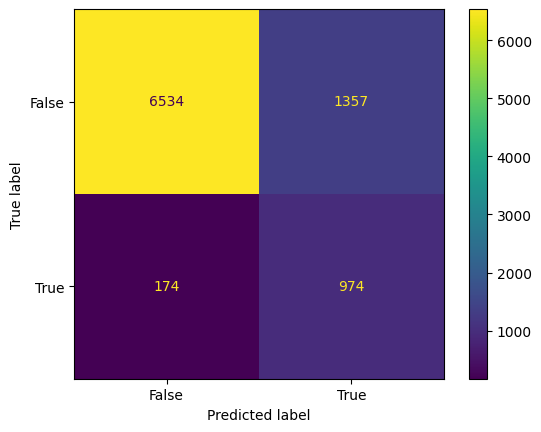

In [347]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_grad, X_test, y_test);

In [348]:
model_grad.best_estimator_

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['job', 'marital', 'education', 'default',
                                      'housing', 'loan', 'contact', 'month',
                                      'poutcome'],
                                mapping=[{'col': 'job', 'data_type': dtype('O'),
                                          'mapping': entrepreneur      1
services          2
blue-collar       3
technician        4
management        5
unknown           6
admin.            7
self-employed     8
retired           9
housemaid        10
unemployed       11
student          12
NaN              -2
dtype: int64},
                                         {'col': 'mari...
                                         {'col': 'month',
                                          'data_type': dtype('O'),
                                          'mapping': apr     1
jun     2
oct     3
may     4
nov     5
jul     6
aug     7
feb     8
jan     9
dec    10
mar    11
sep    12
NaN    -2
dtype: int64},
                                         {'col': 'poutcome',
                                          'data_type': dtype('O'),
                                          'mapping': unknown    1
failure    2
success    3
other      4
NaN       -2
dtype: int64}])),
                ('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=4, n_estimators=30,
                                            random_state=42))])

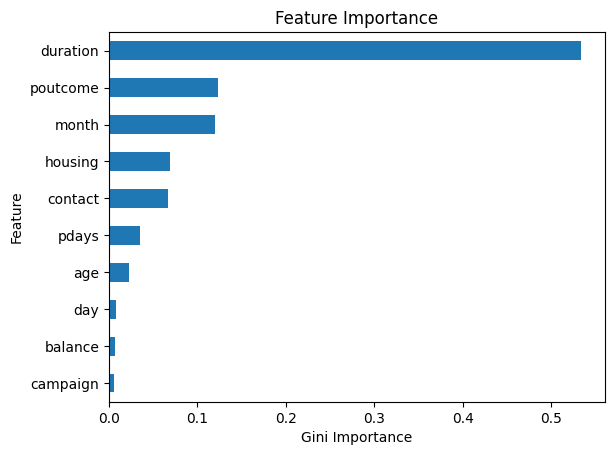

In [349]:
# Get feature names from training data
features = X_test.columns
# Extract importances from model
importances = model_grad.best_estimator_.named_steps['gradientboostingclassifier'].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

Make it interactive

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

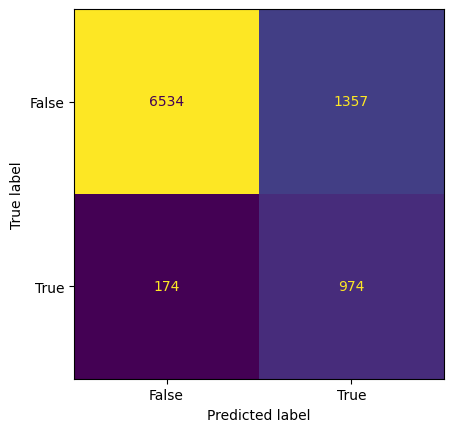

In [350]:
def make_cnf_matrix2(threshold):
    y_pred_proba = model_grad.predict_proba(X_test)[:, -1]
    y_pred = y_pred_proba > threshold
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    recall = (tp/(tp+fn))
    precision = (tp/(tp+fp))

    print(f'Recall: {recall}')
    print(f'Precision: {precision}')

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False);

thresh_widget = FloatSlider(min=0, max=1, step=0.05, value=0.5)

interact(make_cnf_matrix2, threshold=thresh_widget);

# Using the test value

In [351]:
# Import libraries

import pickle

with open('model_random_f', 'wb') as f:
  load_model_rf = pickle.dump(model, f)

with open('model_gb', 'wb') as f:
  load_model_gb = pickle.dump(model_grad, f)


# Add make_predictions function
def wrangle(data):
  df= pd.read_csv(data)
  mask_b = df['balance'] < 60_000
  mask_d = df['duration'] < 4_000
  mask_c = df['campaign'] < 50
  mask_p = df['previous'] < 100

  df = df[mask_b & mask_c & mask_d & mask_p]
  df['y'] =df['y'].map({'yes': True, 'no': False})

  return df

def make_predictions(data_filepath, model_filepath):
    # make X_test features
    X_test = wrangle(data_filepath).drop(columns='y')

    # load model
    with open(model_filepath, 'rb') as f:
        model = pickle.load(f)

    # make predictions
    y_test_pred = model.predict(X_test)

    # convert y_test set to series
    y_test_pred = pd.Series(y_test_pred, index=X_test.index, name='term-loan')

    return y_test_pred

In [352]:
new_df = wrangle('/content/bank.csv')
X_test_new = new_df.drop(columns=target)
y_test_new = new_df[target]

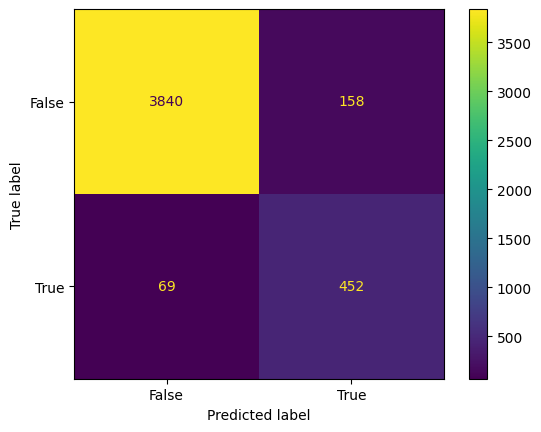

In [353]:
ConfusionMatrixDisplay.from_estimator(model, X_test_new, y_test_new);

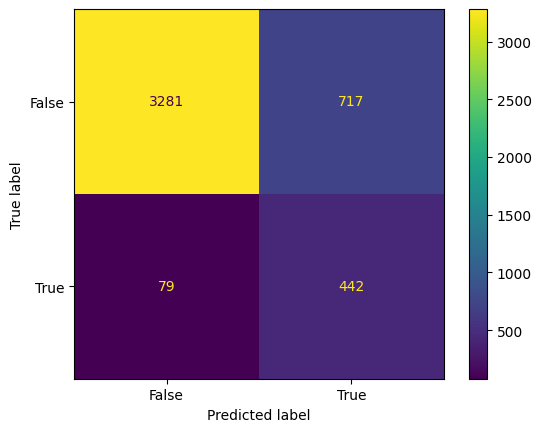

In [354]:
ConfusionMatrixDisplay.from_estimator(model_grad, X_test_new, y_test_new);

In [355]:
y_test_pred_rf = make_predictions('/content/bank.csv','/content/model_random_f')
y_test_pred_rf.value_counts(normalize=True)

False    0.865014
True     0.134986
Name: term-loan, dtype: float64

In [356]:
y_test_pred_gb = make_predictions('/content/bank.csv','/content/model_gb')
y_test_pred_gb.value_counts(normalize=True)

False    0.743527
True     0.256473
Name: term-loan, dtype: float64

***In the Gradient Boosting Model it predicts for the banks product (term-loan) to be taken more than that of in the Random Forest and Decision Tree model***